# Exercise 7.1
### What relationship does it suggest between carat and cut? Create a plot to directly visualize this relation-
### ship. What do you conclude? How does this explain the paradoxical trend we found in the plot below?

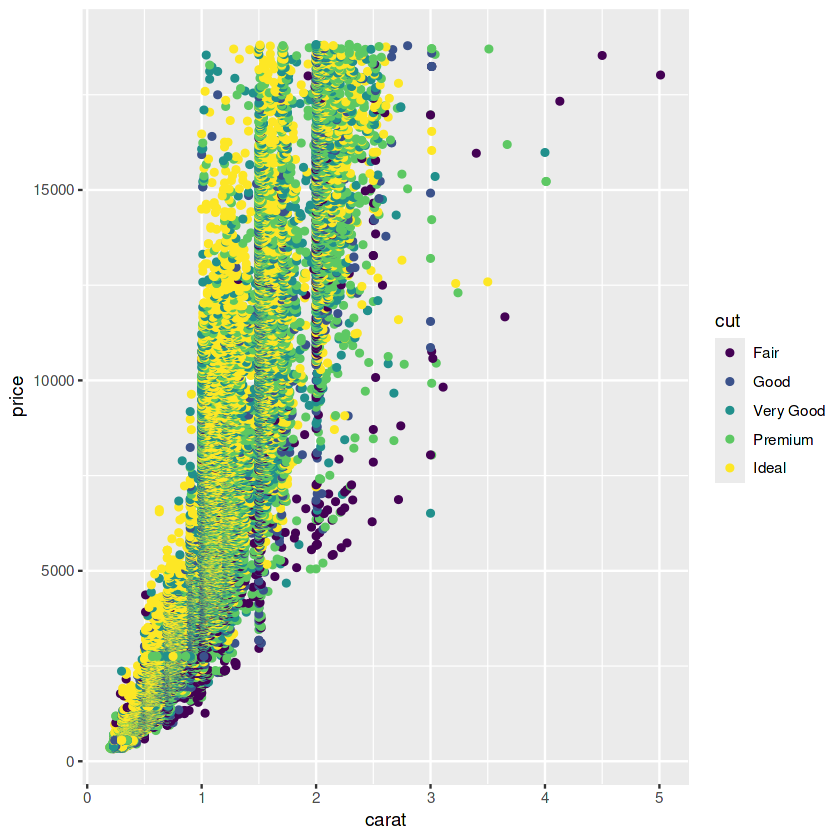

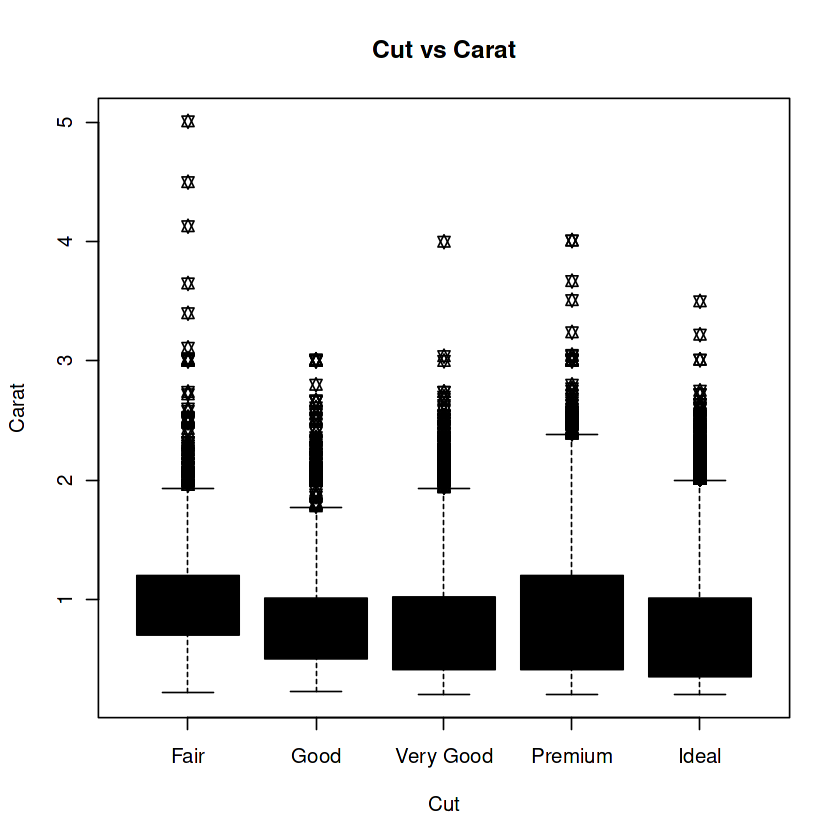

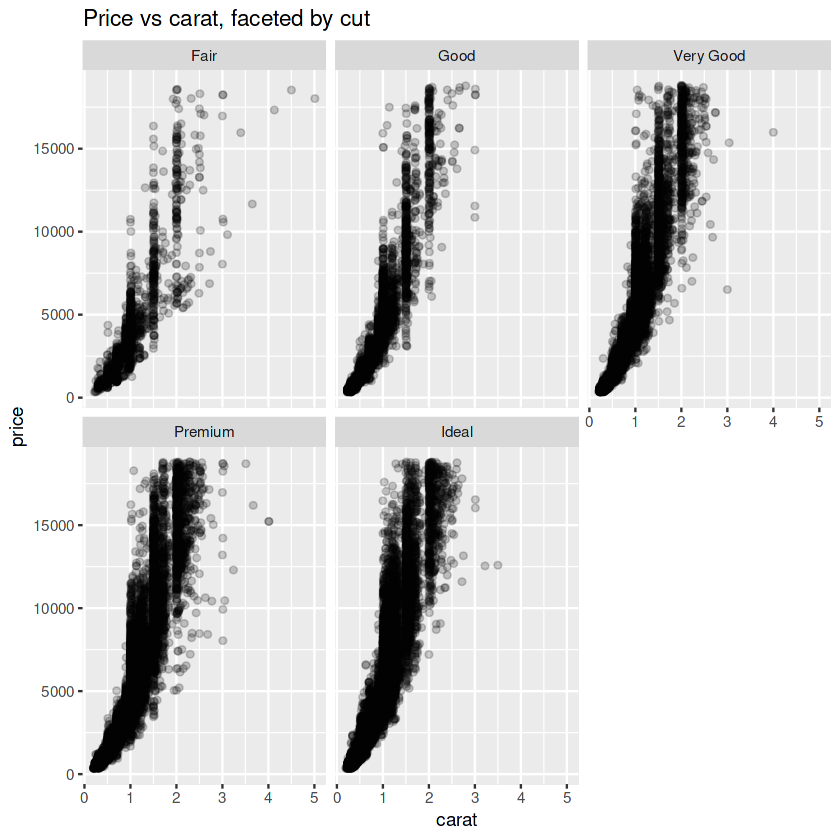

In [15]:
library(tidyverse)
library(dplyr)

x = diamonds$cut
y = diamonds$carat

ggplot(data = diamonds) +
geom_point(mapping = aes(x = carat, y = price, color = cut))

# Worse cuts tend to have larger carat sizes while better cuts tend to have
# smaller carat sizes.

plot(x, y,
     main = "Cut vs Carat",
     xlab = "Cut",                                
     ylab = "Carat",                                 
     pch = 11,                                             
     col = "black")
# B. LM & Summary
bodies_lm <- lm(y ~ x, data = diamonds)

ggplot(diamonds, aes(x = carat, y = price)) +
  geom_point(alpha = 0.2) +
  facet_wrap(~ cut) +
  labs(title = "Price vs carat, faceted by cut")

#Looking at price inside cut categories we can see that price still increases with carat but for a fixed carat, better cuts are 
# more expensive. 

# Lecture 3 exercise: 
### Use dplyr to answer the following questions:
### A. What is the minimum diamond price in this dataset? See if you can find the answer in two different
### ways (i.e. using two different dplyr verbs).
### B. How many diamonds have length at least one and a half times their width?
### C. Among diamonds with colors D, E, F, G, what is the median number of carats for diamonds of each
### cut?

In [29]:
head(diamonds)
prc = diamonds$price
min(prc)

#A.
diamonds %>%
  summarise(diamonds$price <- min(diamonds$price, na.rm = TRUE))


x = diamonds$x
y = diamonds$y

library(tidyverse)
#B. 
diamonds %>%
  filter(x >= 1.5 * y) %>%
  count()


#C.
diamonds %>%
  filter(color %in% c("D", "E", "F", "G")) %>%
  group_by(cut) %>%
  summarise(median_carat = median(carat))



carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


[1] 326

"diamonds$price <- min(diamonds$price, na.rm = TRUE)"
<int>
326


n
<int>
10


cut,median_carat
<ord>,<dbl>
Fair,0.91
Good,0.72
Very Good,0.70
Premium,0.71
Ideal,0.52


# Lecture 4


In [32]:
heights <- read.csv("/kaggle/input/heights/heights.csv")
head(heights)

library(tidyverse)
table1
table2
table3
table4a
table4b

,earn,height,sex,ed,age,race
,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>
1,50000,74.42444,male,16,45,white
2,60000,65.53754,female,16,58,white
3,30000,63.62920,female,16,29,white
4,50000,63.10856,female,16,91,other
5,51000,63.40248,female,17,39,white
6,9000,64.39951,female,15,26,white


country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


country,year,type,count
<chr>,<dbl>,<chr>,<dbl>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


country,year,rate
<chr>,<dbl>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


country,1999,2000
<chr>,<dbl>,<dbl>
Afghanistan,745,2666
Brazil,37737,80488
China,212258,213766


country,1999,2000
<chr>,<dbl>,<dbl>
Afghanistan,19987071,20595360
Brazil,172006362,174504898
China,1272915272,1280428583


#### table1
#### Each row represents one observation: a specific country–year combination.Each column represents a variable, such as the number of cases, the population, and the year.
#### table2
#### Still defined by country and year but one of the variables has been split in rows instead of columns. Each row represents either cases or population, identified by a variable column (often called something like type).
#### table3
#### Each row corresponds to a country and year, but the number of cases and population are stored together as a single string (for example, "cases/population").
#### table4a & table4b
#### The two have a similar structure and they are both untidy because the year should be a variable not part of a column.

#### Exercise: Use pivot_longer() to tidy table4b in a similar fashion. What is the difference between the code used to tidy table4a and table4b?

In [33]:
table4b %>%
  pivot_longer(
    cols = c(`1999`, `2000`),
    names_to = "year",
    values_to = "population"
  )


country,year,population
<chr>,<chr>,<dbl>
Afghanistan,1999,19987071
Afghanistan,2000,20595360
Brazil,1999,172006362
Brazil,2000,174504898
China,1999,1272915272
China,2000,1280428583


In [34]:
#Why does this code fail?
#table4a %>%
#pivot_longer(cols = c(1999, 2000), names_to = "year", values_to = "cases")
# Error: Can't subset columns that don't exist.
# Locations 1999 and 2000 don't exist.
# There are only 3 columns.

#Columns aren’t actually named 1999 and 2000.


#Tidy the simple tibble below. Do you need to make it wider or longer? What are the variables?

# We need to make it longer, male and female are values of the same variable, but they’re stored as separate columns.

tribble(
  ~pregnant, ~male, ~female,
  "yes", NA, 10,
  "no", 20, 12
) %>%
  pivot_longer(
    cols = c(male, female),
    names_to = "sex",
    values_to = "count"
  )



pregnant,sex,count
<chr>,<chr>,<dbl>
yes,male,NA
yes,female,10
no,male,20
no,female,12


#### Exercise: Consider the two tibbles below. What is the key column? Without writing any code, can you predict how many rows and columns left_join(x,y) and left_join(y,x) will have?

##### x <- tribble(
##### ~state, ~population,
##### "PA", 12.8,
##### "TX", 28.6,
##### "NY", 19.5
##### )
##### y <- tribble(
##### ~state, ~capital,
##### "TX", "Austin",
##### "CA", "Sacramento",
##### "NY", "New York City",
##### "MI", "Lansing"
##### )

### The key column is state, left join x,y would return a 3x3 tibble while left join y,x would return a 4x3 tibble.